In [ ]:
#!pip install tbats

# TBATS

- Trigonometric
- Box-Cox transformation
- ARMA erros
- Trend component
- Seasonal component


![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*yfruZnSYsNt1X1uyag46eQ.png)


Source: https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a

Each seasonality is modeled by a trigonometric representation based on Fourier series.

Advantages:
- only 2 seed states (initial values) for each seasonality regardless of its length
- seasonalities of non-integer lengths (e.g. 365.25 for daily observations)

## Generating Data

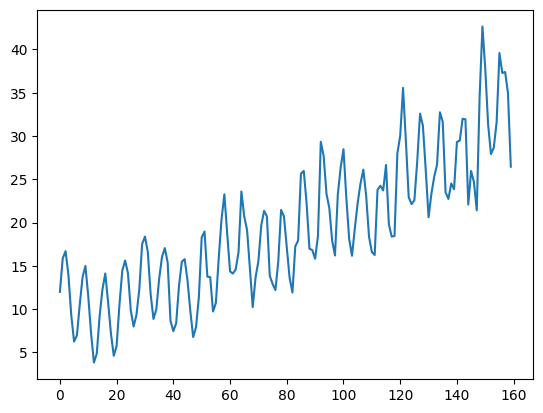

In [ ]:
import numpy as np
from tbats import TBATS
from matplotlib import pyplot as plt

np.random.seed(2342)
t = np.array(range(0, 160))
# starting point
y = 10
# weekly
y += 5 * np.sin(t * 2 * np.pi / 7)
# monthly
y += 2 * np.cos(t * 2 * np.pi / 30.5)
# trend
y += (t / 20) ** 1.5
# Noise
y += np.random.normal(size=160) * t / 50

plt.plot(y)

## Fitting Model(s)

TBATS try many different models:

- with Box-Cox transformation and without it
- with and without Trend
- with and without Trend Damping
- with and without ARMA(p,q) process used to model residuals
- non-seasonal model
- various amounts of harmonics used to model seasonal effects

And then selects the best model using [Akaike Information Criteria (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion).

In [ ]:
# Create estimator
if __name__ == '__main__':
    estimator = TBATS(seasonal_periods=[7, 30.5], n_jobs=1)

In [ ]:
# Fit model
fitted_model = estimator.fit(y)

# Forecast 14 steps ahead
y_forecasted = fitted_model.forecast(steps=14)

# Summarize fitted model
print(fitted_model.summary())

Use Box-Cox: True
Use trend: True
Use damped trend: True
Seasonal periods: [ 7.  30.5]
Seasonal harmonics [1 1]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.654009
Smoothing (Alpha): 0.132374
Trend (Beta): 0.022704
Damping Parameter (Phi): 0.949885
Seasonal Parameters (Gamma): [ 2.10216015e-08 -2.10683596e-10 -9.78422152e-09  1.38781551e-09]
AR coefficients []
MA coefficients []
Seed vector [ 5.67545782 -0.13236325  0.04997721  1.93653454  0.62352128  0.0945025 ]

AIC 1024.789453


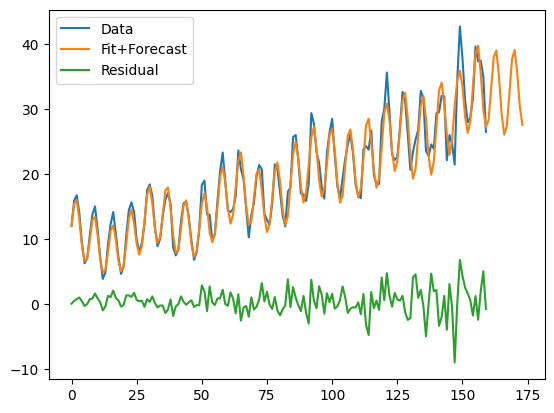

In [ ]:
plt.plot(y, label='Data')
plt.plot(np.concatenate([fitted_model.y_hat, y_forecasted]), label='Fit+Forecast')
plt.plot(fitted_model.resid, label='Residual')
plt.legend()